<a href="https://colab.research.google.com/github/Kirticat/ML/blob/main/EXp2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'logistic function')

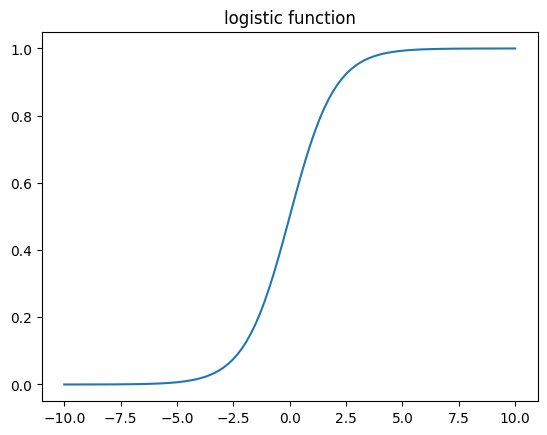

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-10,10,100)
plt.plot(z, logistic(z))
plt.title('logistic function')

In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
    return J

In [ ]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

In [ ]:
import numpy as np

def logistic(z):
    """Compute the logistic (sigmoid) function."""
    return 1 / (1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=0.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # tolerance for the norm of gradients
        self.max_iters = max_iters  # maximum number of iterations for gradient descent
        self.verbose = verbose

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])  # Add bias term
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0

        # Gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])  # Add bias term
        yh = logistic(np.dot(x, self.w))  # Predict output
        return yh

    def gradient(self, x, y):
        """Compute the gradient of the logistic loss function."""
        yh = logistic(np.dot(x, self.w))  # Predic


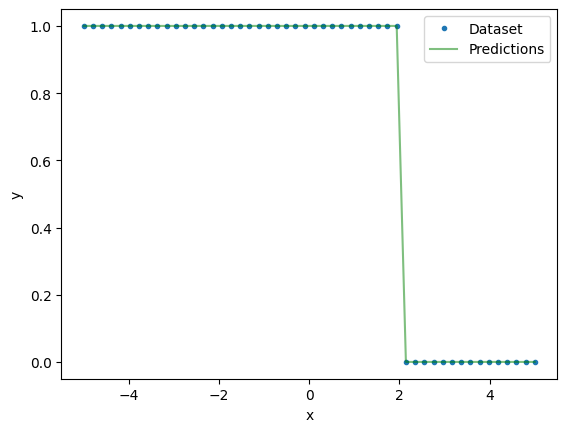

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

N = 50  # Number of samples
x = np.linspace(-5, 5, N).reshape(-1, 1)  # Reshape x to be 2D for LogisticRegression
y = (x < 2).astype(int).ravel()  # Flatten y to be 1D

# Initialize and fit the model
model = LogisticRegression(verbose=True, max_iter=1000)  # Increase max_iter if needed
model.fit(x, y)

# Predict
yh = model.predict(x)

# Plotting
plt.plot(x, y, '.', label='Dataset')
plt.plot(x, yh, 'g', alpha=.5, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

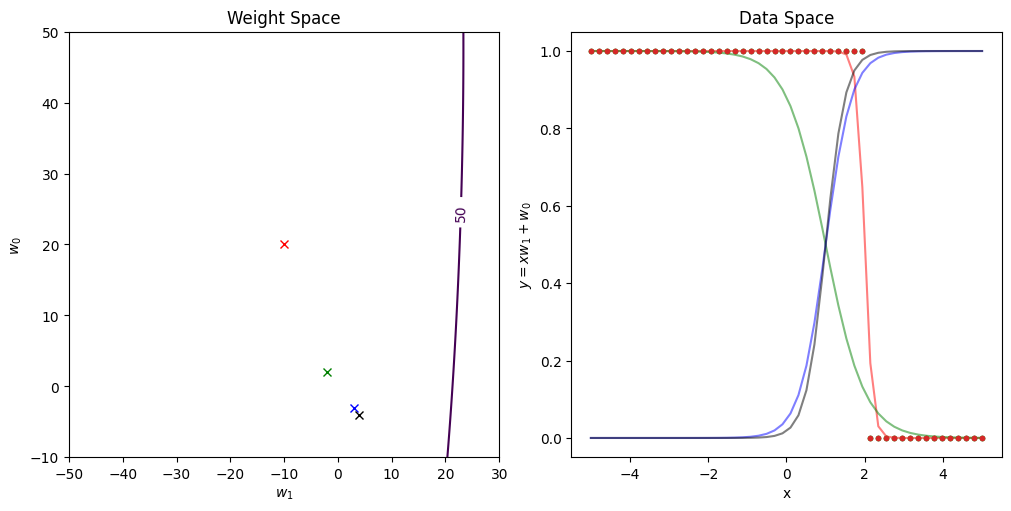

In [ ]:
x_plus_bias = np.column_stack([x, np.ones(x.shape[0])])
cost_w = lambda param: cost_fn(x_plus_bias, y, param)  # Define the cost just as a function of parameters
model_list = [(-10, 20), (-2, 2), (3, -3), (4, -4)]

fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(10, 5))

# Define the plot_contour function
def plot_contour(cost_w, x_range, y_range, levels, ax):
    w1 = np.linspace(x_range[0], x_range[1], 100)
    w0 = np.linspace(y_range[0], y_range[1], 100)
    W1, W0 = np.meshgrid(w1, w0)
    Z = np.array([cost_w(np.array([w1, w0])) for w1, w0 in zip(np.ravel(W1), np.ravel(W0))])
    Z = Z.reshape(W1.shape)
    contour = ax.contour(W1, W0, Z, levels=levels)
    ax.clabel(contour)

# Call the plot_contour function
plot_contour(cost_w, [-50, 30], [-10, 50], [50], axes[0])

colors = ['r', 'g', 'b', 'k']
for i, w in enumerate(model_list):
    axes[0].plot(w[0], w[1], 'x' + colors[i])
    axes[1].plot(x, y, '.')
    axes[1].plot(x, logistic(w[1] + np.dot(w[0], x)), '-' + colors[i], alpha=.5)

axes[0].set_xlabel(r'$w_1$')
axes[0].set_ylabel(r'$w_0$')
axes[0].set_title('Weight Space')
axes[1].set_xlabel('x')
axes[1].set_ylabel(r'$y = x w_1 + w_0$')
axes[1].set_title('Data Space')
plt.show()

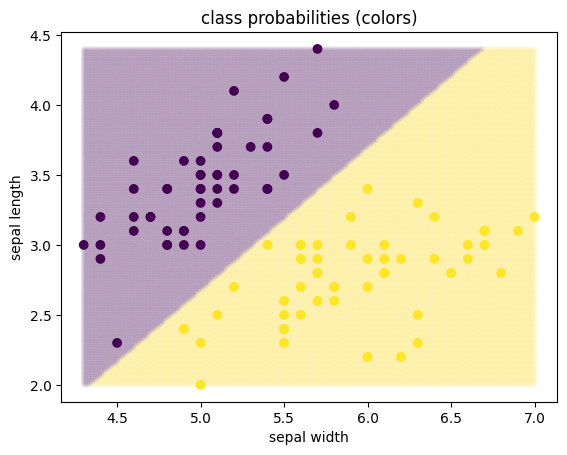

In [ ]:
from sklearn import datasets
dataset = datasets.load_iris()
x, y = dataset['data'][:,:2], dataset['target']
x, y = x[y < 2], y[y< 2]                                # we only take the data of class 0 and 1
model = LogisticRegression()
yh = model.fit(x,y).predict(x)

x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
yh_all = model.predict(x_all)
plt.scatter(x[:,0], x[:,1], c=yh, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=yh_all, marker='.', alpha=.05)
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.title('class probabilities (colors)')
plt.show()